In [34]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [5]:
df=pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [10]:
df.isnull().sum()
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df.isnull().sum()

C:\Users\NILOY\AppData\Local\Temp\ipykernel_21652\658010014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\NILOY\AppData\Local\Temp\ipykernel_21652\658010014.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
X=df[['Age','Fare']]
y=df['Survived']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\NILOY\AppData\Local\Temp\ipykernel_21652\3671857659.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],bins=20,hist=


Text(0.5, 1.0, 'Age Q-Q Plot')

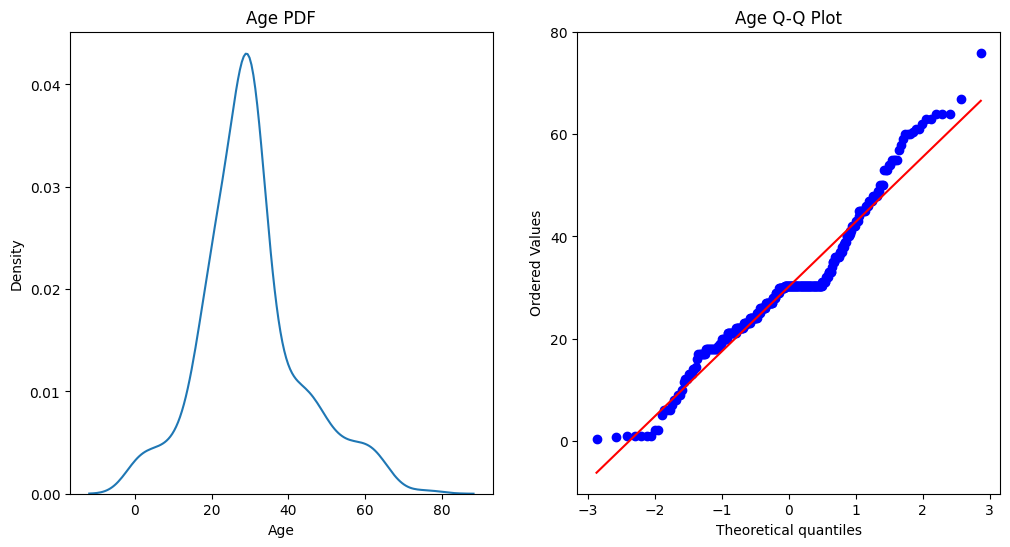

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(X_train['Age'],bins=20,hist=False)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age Q-Q Plot')

C:\Users\NILOY\AppData\Local\Temp\ipykernel_21652\1019449121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'],bins=20,hist=False)


Text(0.5, 1.0, 'Fare Q-Q Plot')

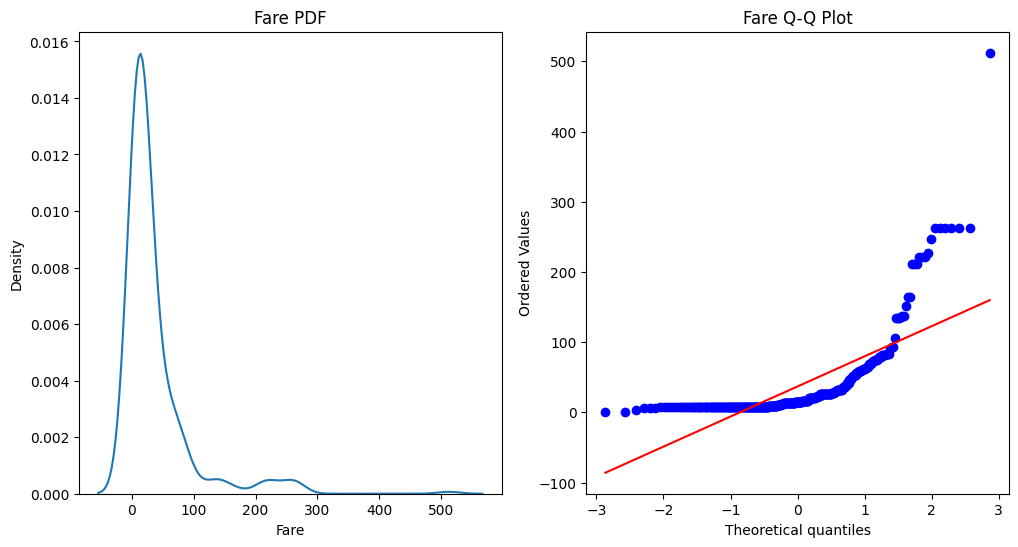

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(X_train['Fare'],bins=20,hist=False)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare Q-Q Plot')

In [35]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()

In [36]:
clf.fit( X_train,y_train)
clf2.fit( X_train,y_train)
clf3.fit( X_train,y_train)

y_pred=clf.predict(X_test)
y2_pred=clf2.predict(X_test)
y3_pred=clf3.predict(X_test)

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,y2_pred))
print("Random Forest Classifier Accuracy:",accuracy_score(y_test,y3_pred))

Logistic Regression Accuracy: 0.6071428571428571
Decision Tree Classifier Accuracy: 0.5357142857142857
Random Forest Classifier Accuracy: 0.6190476190476191


In [37]:
trf=FunctionTransformer(func=np.log1p)

In [38]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [39]:
clf.fit( X_train_transformed,y_train)
clf2.fit( X_train_transformed,y_train)
clf3.fit( X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y2_pred=clf2.predict(X_test_transformed)
y3_pred=clf3.predict(X_test_transformed)

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,y2_pred))
print("Random Forest Classifier Accuracy:",accuracy_score(y_test,y3_pred))

Logistic Regression Accuracy: 0.6190476190476191
Decision Tree Classifier Accuracy: 0.5476190476190477
Random Forest Classifier Accuracy: 0.6428571428571429


Text(0.5, 1.0, 'Age Q-Q Plot after Transformation')

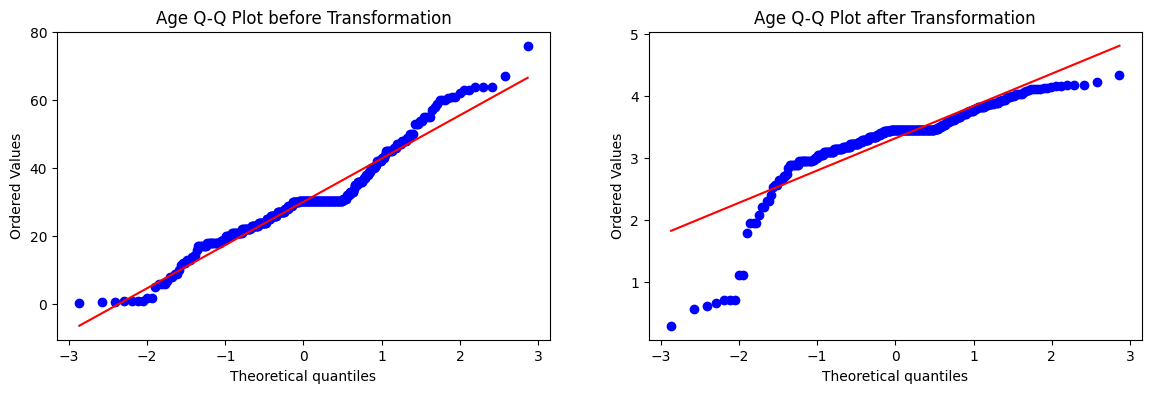

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age Q-Q Plot before Transformation')


plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm", plot=plt)
plt.title('Age Q-Q Plot after Transformation')

Text(0.5, 1.0, 'Fare Q-Q Plot after Transformation')

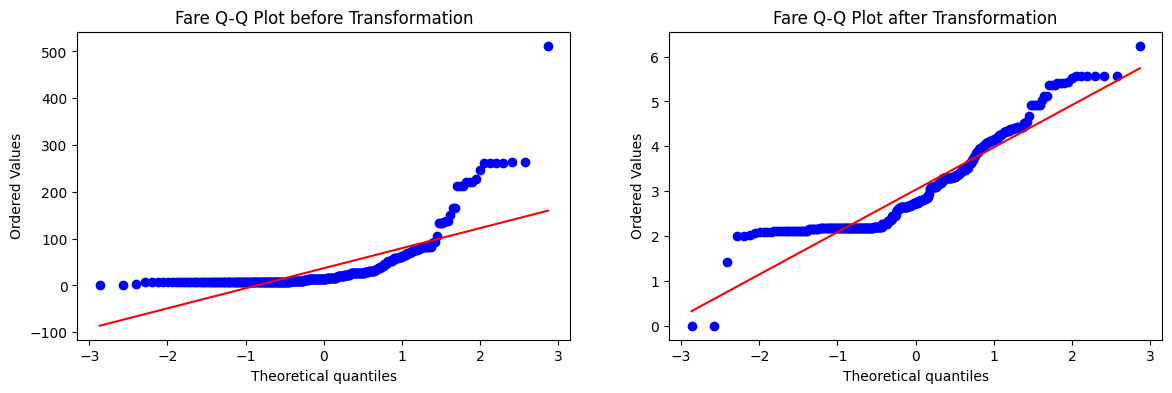

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare Q-Q Plot before Transformation')


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm", plot=plt)
plt.title('Fare Q-Q Plot after Transformation')

In [42]:
trf2=ColumnTransformer(
    transformers=[
        ('log1p', FunctionTransformer(func=np.log1p), ['Fare'])
        ], remainder='passthrough')

In [43]:
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [44]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()

clf.fit( X_train_transformed2,y_train)
clf2.fit( X_train_transformed2,y_train)
clf3.fit( X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y2_pred=clf2.predict(X_test_transformed2)
y3_pred=clf3.predict(X_test_transformed2)

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred))
print("Decision Tree Classifier Accuracy:",accuracy_score(y_test,y2_pred))
print("Random Forest Classifier Accuracy:",accuracy_score(y_test,y3_pred))

Logistic Regression Accuracy: 0.6190476190476191
Decision Tree Classifier Accuracy: 0.5595238095238095
Random Forest Classifier Accuracy: 0.6071428571428571


In [63]:
def apply_transform(transform):
    X=df[['Age','Fare']]
    y=df['Survived']
    trf=ColumnTransformer(
        transformers=[
            ('log1p', FunctionTransformer(transform), ['Fare'])
            ], remainder='passthrough')
    
    X_train_transformed=trf.fit_transform(X)
    
    clf=LogisticRegression()
    print('Accuracy',np.mean(cross_val_score(clf, X_train_transformed, y,scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist="norm", plot=plt)
    plt.title('Fare Q-Q Plot before Transformation')


    plt.subplot(122)
    stats.probplot(X_train_transformed[:, 0], dist="norm", plot=plt)
    plt.title('Fare Q-Q Plot after Transformation')



    

Accuracy 0.6506968641114981


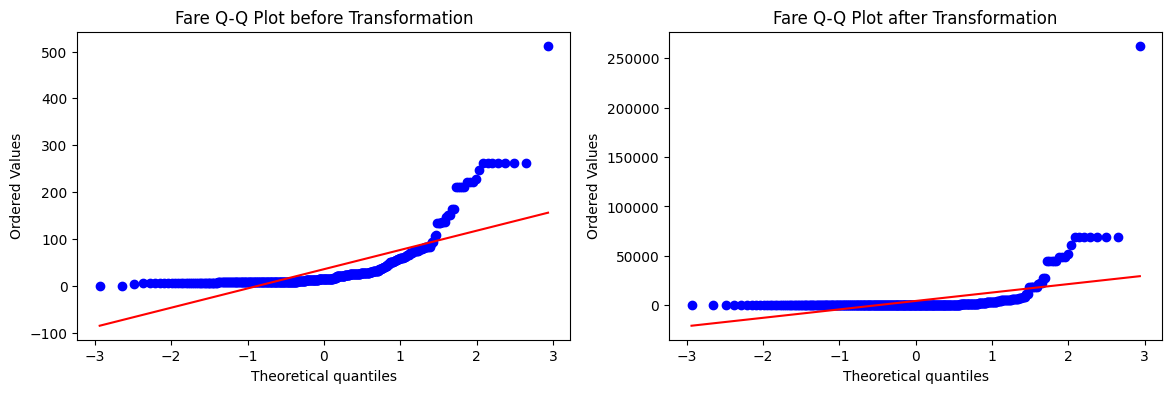

In [71]:
apply_transform(lambda x: x**2)